<a href="https://colab.research.google.com/github/Jaidureja11/BLINKIT-ANALYSIS-DASHBOARD/blob/main/Blinkit%20data%20analysis%20in%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#blinkit analysis


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("BlinkIT Grocery Data.csv")
df.head(10)

Saving BlinkIT Grocery Data.csv to BlinkIT Grocery Data (1).csv


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:

print("size of data:", df.shape)

size of data: (8523, 12)


In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [ ]:
#Total Sales
total_sales = df['Sales'].sum()

#avg sales
avg_sales = df['Sales'].mean()


#no. of items sold
no_of_items_sold = df['Sales'].count()

#Avg Rating
avg_rating = df['Rating'].mean()

print(f"Total Sales:${total_sales:,.1f} ")
print(f"avg sales :${avg_sales:,.1f} ")
print(f"no. of items sold :{no_of_items_sold:,.1f} ")
print(f"Avg Rating :{avg_rating:,.1f} ")
#f string used ... comma used , .1f used for decimal place

Total Sales:$1,201,681.5 
avg sales :$141.0 
no. of items sold :8,523.0 
Avg Rating :4.0 


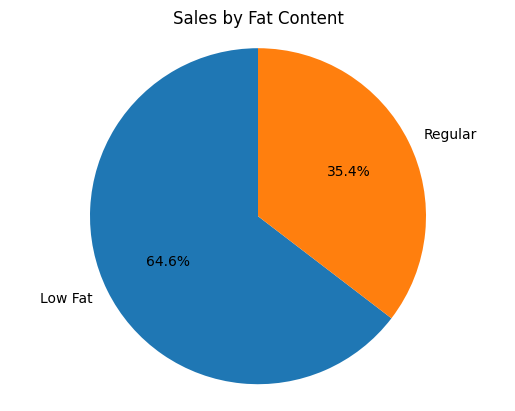

In [ ]:
# Total sales by fat content
Sales_by_fat = df.groupby ('Item Fat Content')["Sales"].sum()
plt.pie(Sales_by_fat, labels = Sales_by_fat.index,
autopct = '%.1f%%',
startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#group by used when multiple things in one field , SUMMIT BY SALES and aggregate sum

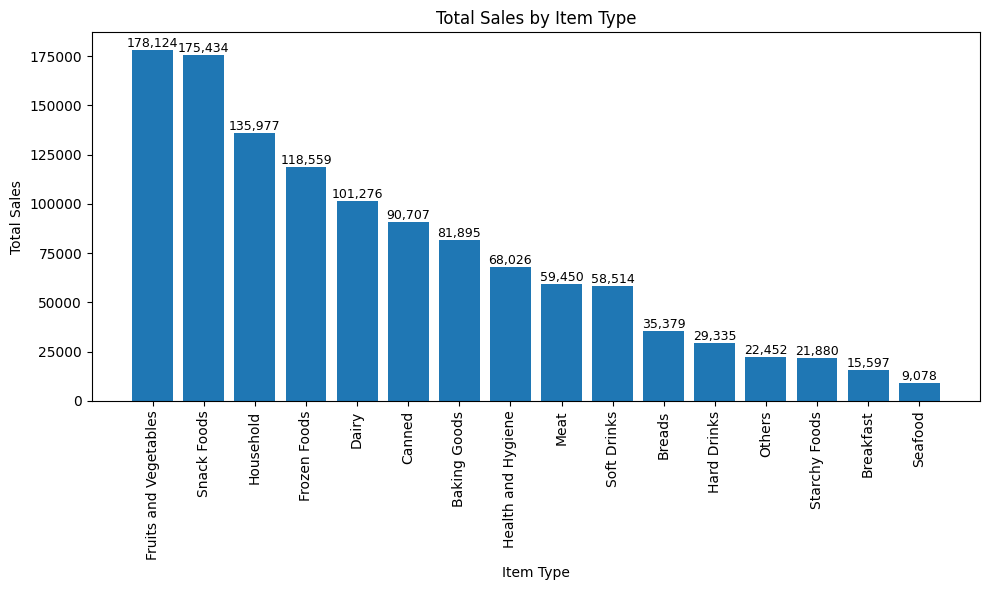

In [ ]:
#TOTAL SALES BY ITEM TYPE
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values) #axis define x has label and y has values

plt.xticks(rotation= 90) # x wale label
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars :
  plt.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():,.0f}',
            ha='center', va='bottom',fontsize=9) #data labels bars pe 178,124 wala

plt.tight_layout() #not overlap
plt.show()


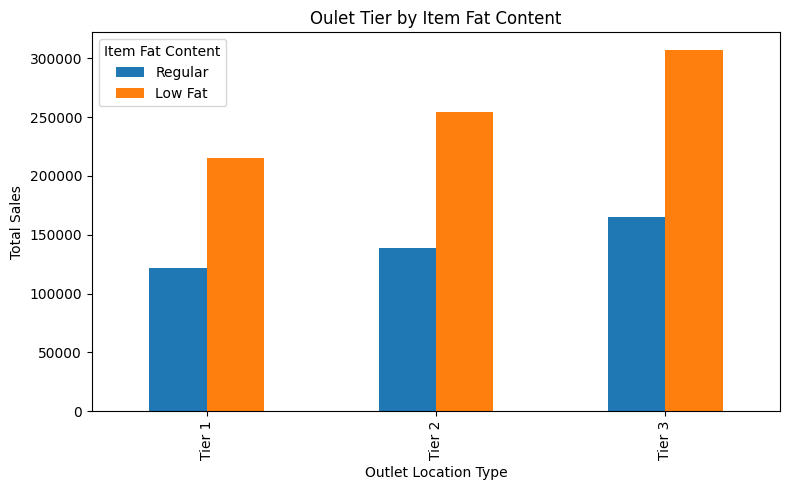

In [ ]:
#FAT CONTENT BY OUTLET FOR TOTAL SALES
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar',  figsize=(8,5), title = 'Oulet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


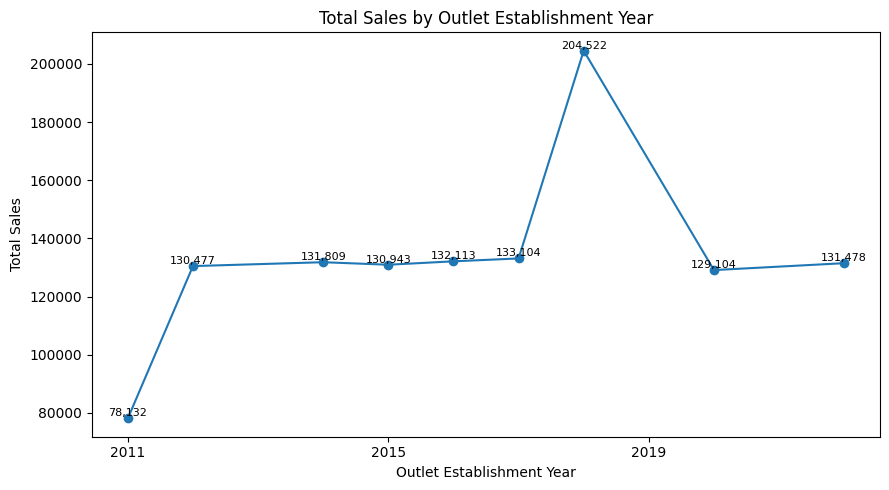

In [ ]:
# TOTAL SALES BY OUTLET ESTABLISHMENT
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

start_year = sales_by_year.index.min()
end_year = sales_by_year.index.max()
plt.xticks(ticks=range(start_year, end_year+1, 4))

for x,y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

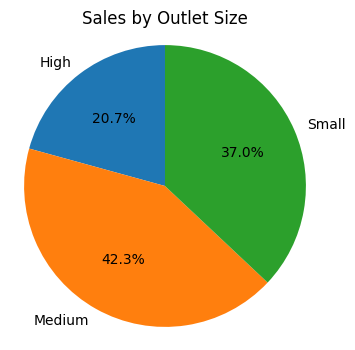

<Figure size 640x480 with 0 Axes>

In [ ]:
#SALES BY OUTLET SIZE
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize =(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index,
autopct = '%.1f%%',#adds labels
startangle = 90)
plt.title('Sales by Outlet Size')
plt.axis('equal')
plt.show()
plt.tight_layout()

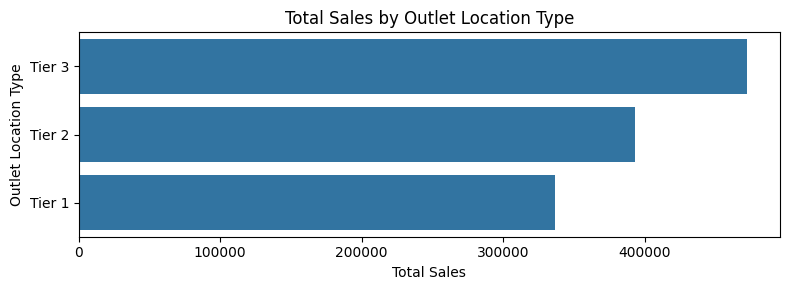

In [ ]:
#SALES BY OUTLET LOCATION
#horizontal bar chart

sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Total Sales by Outlet Location Type')

plt.tight_layout()
plt.show()